# Bounded confidence model with networkx graph with all same weights

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Defining the parameters
We first define some parameters such as the number of agents n, the number of connections per agent m, the probability of rewiring a connection p, the number of time steps tmax, and the confidence threshold alpha.

In [3]:
# Graph Parameters
n = 50 # number of agents
tmax = 1000

# Bounded confidence model parameters
epsilon = 0.25 # Tolerance to differing opinions
mew = 0.1 # Adjustment rate

num_simulation = 200

# Generating Graph
We then generate an initial graph using the complete_graph function from NetworkX and assign random initial opinions to each agent.

In [4]:
G = nx.erdos_renyi_graph(n,0.1)

# Simulation Loop
The simulation loop goes through each node at every time step and checks whether its opinion is within the confidence threshold of the average opinion of its neighbors. If so, the agent updates its opinion to the average. The opinions are changed at the end of each loop.

In [5]:
def simulate_loop(G, opinions, epsilon, mew, iterations):
    for t in range(iterations):
        
        new_opinions = np.ndarray.copy(opinions)
        
        for i in range(G.number_of_nodes()):
    
            # Get opinions of neighbors
            neighbors = list(G.neighbors(i))
            
            # Test if any neighbors are within tolerance and update opinions
            for j in neighbors:
                if abs(opinions[i] - opinions[j]) < epsilon:
                    new_opinions[i] = opinions[i] - mew * (opinions[i] - opinions[j])
                    new_opinions[j] = opinions[j] + mew * (opinions[i] - opinions[j])
        
        opinions = new_opinions
    return opinions

# Clustering

To understand clustering, the model must be simulated multiple times and compared. The function generate_opinions creates a dictionary which has simulation number as key and list of opinions as value.

In [6]:
def generate_opinions(G, epsilon, mew, iterations, num_simulations):
    results = [ np.random.uniform(-1.0,1.0,n) for _ in range(num_simulations)]

    for i in range(num_simulations):
        results[i] = simulate_loop(G,results[i], epsilon, mew, iterations)
    
    return results


In [7]:
res = generate_opinions(G, epsilon, mew, tmax, num_simulation)

# Data processing


In [8]:
import pandas as pd

df = pd.DataFrame(res)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.572592,-0.838597,0.029044,-0.261968,0.192433,-0.261968,0.842896,-0.421507,-0.395196,0.486671,...,0.302793,-0.838597,0.141901,0.029044,-0.837709,-0.197870,-0.261968,0.192433,-0.891461,0.422036
1,0.544735,-0.703908,-0.860574,-0.513753,0.573867,0.226081,-0.138173,0.544735,0.544735,-0.510674,...,-0.138173,0.915152,-0.046686,0.950984,0.573867,0.915152,-0.138173,0.573867,0.544735,-0.313478
2,-0.880827,-0.667538,0.928883,-0.348794,-0.249117,-0.541875,0.811494,0.367970,-0.541875,-0.844686,...,0.965114,0.367970,-0.249117,0.360336,-0.348794,0.043365,0.424777,-0.249117,-0.616694,0.043365
3,-0.789211,-0.789211,-0.789211,0.698207,-0.127655,0.698207,-0.904722,0.698207,-0.484086,-0.484086,...,-0.129180,-0.484086,0.698207,0.277514,-0.120927,-0.879340,0.698207,-0.566848,0.698207,-0.904722
4,-0.282684,0.425177,0.781248,0.569815,0.569815,0.909502,0.178638,-0.004888,0.393531,-0.282684,...,-0.282684,0.569815,0.324022,-0.569380,-0.611754,0.569815,-0.282684,-0.519218,-0.584100,0.521198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.438760,0.743384,-0.075271,-0.130652,0.511204,0.354669,-0.572864,0.354669,0.354669,-0.130652,...,0.898448,-0.670142,0.073158,-0.843811,0.073158,-0.670142,-0.130652,-0.802360,-0.122808,0.466602
196,0.023128,-0.553792,0.886666,0.023128,0.660100,0.349983,0.660100,0.660100,0.023128,0.023128,...,0.023128,0.027965,0.618277,0.886666,-0.613862,0.027965,0.023128,-0.613862,-0.569632,-0.553792
197,-0.776814,-0.765630,-0.765630,-0.765630,-0.776814,-0.776814,0.899077,-0.765630,-0.175735,-0.765630,...,0.540658,-0.324381,0.694818,0.272875,0.178215,0.400597,0.540658,0.516450,0.540658,0.065460
198,0.937314,-0.686595,0.058288,-0.013769,0.134673,-0.726813,-0.021956,-0.021956,-0.726813,-0.013769,...,0.602889,-0.021956,-0.958927,0.058288,0.870933,0.824849,-0.013769,0.134673,-0.686595,0.513613


In [9]:
buckets = np.arange(-1, 1 + 0.1, 0.1)

groups = pd.cut(df.iloc[0], buckets, labels=buckets[:-1])

groups

/opt/homebrew/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0    -6.000000e-01
1    -9.000000e-01
2    -2.220446e-16
3    -3.000000e-01
4     1.000000e-01
5    -3.000000e-01
6     8.000000e-01
7    -5.000000e-01
8    -4.000000e-01
9     4.000000e-01
10   -4.000000e-01
11    1.000000e-01
12   -9.000000e-01
13   -4.000000e-01
14    9.000000e-01
15    1.000000e-01
16   -5.000000e-01
17    1.000000e-01
18   -4.000000e-01
19    8.000000e-01
20   -4.000000e-01
21   -2.000000e-01
22   -9.000000e-01
23   -4.000000e-01
24    8.000000e-01
25    1.000000e-01
26   -4.000000e-01
27   -9.000000e-01
28   -4.000000e-01
29   -8.000000e-01
30    7.000000e-01
31   -3.000000e-01
32    7.000000e-01
33    9.000000e-01
34    1.000000e-01
35    9.000000e-01
36    1.000000e-01
37   -2.220446e-16
38   -9.000000e-01
39    9.000000e-01
40    3.000000e-01
41   -9.000000e-01
42    1.000000e-01
43   -2.220446e-16
44   -9.000000e-01
45   -2.000000e-01
46   -3.000000e-01
47    1.000000e-01
48   -9.000000e-01
49    4.000000e-01
Name: 0, dtype: category
Categories (20, float64):

The clusters data frame here is a table. the rows indicate the the nodes. the columns are simulation number.

In [10]:
clusters = pd.DataFrame([pd.cut(df.iloc[i], buckets, labels=buckets[:-1]) for i in range(num_simulation)])

In [11]:
clusters = clusters.T
clusters

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-6.000000e-01,0.5,-9.000000e-01,-0.8,-0.3,8.000000e-01,-5.000000e-01,0.6,-3.000000e-01,0.2,...,1.000000e-01,-3.000000e-01,-2.000000e-01,-7.000000e-01,-0.5,-5.000000e-01,-2.220446e-16,-8.000000e-01,9.000000e-01,4.000000e-01
1,-9.000000e-01,-0.8,-7.000000e-01,-0.8,0.4,-1.000000e+00,-1.000000e+00,0.9,-2.220446e-16,-0.8,...,-3.000000e-01,5.000000e-01,-2.220446e-16,7.000000e-01,-0.2,7.000000e-01,-6.000000e-01,-8.000000e-01,-7.000000e-01,-1.000000e+00
2,-2.220446e-16,-0.9,9.000000e-01,-0.8,0.7,5.000000e-01,-4.000000e-01,0.6,-3.000000e-01,-0.8,...,8.000000e-01,5.000000e-01,7.000000e-01,-3.000000e-01,-0.6,-1.000000e-01,8.000000e-01,-8.000000e-01,-2.220446e-16,-1.000000e+00
3,-3.000000e-01,-0.6,-4.000000e-01,0.6,0.5,-5.000000e-01,-5.000000e-01,0.1,-1.000000e-01,-0.2,...,9.000000e-01,3.000000e-01,7.000000e-01,-9.000000e-01,0.3,-2.000000e-01,-2.220446e-16,-8.000000e-01,-1.000000e-01,7.000000e-01
4,1.000000e-01,0.5,-3.000000e-01,-0.2,0.5,8.000000e-01,-7.000000e-01,-0.7,-7.000000e-01,0.8,...,1.000000e-01,-8.000000e-01,7.000000e-01,-2.220446e-16,0.5,5.000000e-01,6.000000e-01,-8.000000e-01,1.000000e-01,4.000000e-01
5,-3.000000e-01,0.2,-6.000000e-01,0.6,0.9,-1.000000e-01,6.000000e-01,0.5,-2.000000e-01,-0.4,...,-5.000000e-01,5.000000e-01,-9.000000e-01,-1.000000e+00,0.8,3.000000e-01,3.000000e-01,-8.000000e-01,-8.000000e-01,7.000000e-01
6,8.000000e-01,-0.2,8.000000e-01,-1.0,0.1,-1.000000e+00,8.000000e-01,-0.6,-3.000000e-01,0.9,...,4.000000e-01,8.000000e-01,-3.000000e-01,7.000000e-01,-0.2,-6.000000e-01,6.000000e-01,8.000000e-01,-1.000000e-01,-6.000000e-01
7,-5.000000e-01,0.5,3.000000e-01,0.6,-0.1,8.000000e-01,-5.000000e-01,-0.3,-9.000000e-01,-0.2,...,9.000000e-01,-1.000000e+00,1.000000e-01,2.000000e-01,0.9,3.000000e-01,6.000000e-01,-8.000000e-01,-1.000000e-01,4.000000e-01
8,-4.000000e-01,0.5,-6.000000e-01,-0.5,0.3,1.000000e-01,1.000000e-01,-1.0,-9.000000e-01,0.2,...,-5.000000e-01,8.000000e-01,6.000000e-01,9.000000e-01,0.5,3.000000e-01,-2.220446e-16,-2.000000e-01,-8.000000e-01,-1.000000e+00
9,4.000000e-01,-0.6,-9.000000e-01,-0.5,-0.3,-5.000000e-01,-5.000000e-01,0.6,-9.000000e-01,0.9,...,9.000000e-01,5.000000e-01,6.000000e-01,2.000000e-01,0.8,-2.000000e-01,-2.220446e-16,-8.000000e-01,-1.000000e-01,-7.000000e-01


In [12]:
clusters.index[clusters[1] == clusters.iloc[0][1]].tolist()


[0, 4, 7, 8, 10, 16, 17, 25, 31, 32, 35, 36, 38, 44, 47, 48]

In [13]:
clusters_list = {}
for i in range(num_simulation):
    clusters_list[i] = []
    for j in range(n):
        added = False
        for cluster in clusters_list[i]:
            if(j in cluster):
                added = True
                break
        if(not added):
            clusters_list[i].append(clusters.index[clusters[i] == clusters.iloc[j][i]].tolist())

clusters_list

{0: [[0],
  [1, 12, 22, 27, 38, 41, 44, 48],
  [2, 37, 43],
  [3, 5, 31, 46],
  [4, 11, 15, 17, 25, 34, 36, 42, 47],
  [6, 19, 24],
  [7, 16],
  [8, 10, 13, 18, 20, 23, 26, 28],
  [9, 49],
  [14, 33, 35, 39],
  [21, 45],
  [29],
  [30, 32],
  [40]],
 1: [[0, 4, 7, 8, 10, 16, 17, 25, 31, 32, 35, 36, 38, 44, 47, 48],
  [1, 11, 37],
  [2, 14, 39],
  [3, 9, 23, 24],
  [5, 19],
  [6, 12, 27, 34, 40, 46],
  [13, 18, 42],
  [15, 20, 22, 28, 33],
  [21, 41, 43, 45],
  [26],
  [29, 49],
  [30]],
 2: [[0, 9, 24, 31],
  [1, 15, 29, 33, 48],
  [2, 39, 40],
  [3, 10, 12, 18, 22, 44],
  [4, 16, 17, 32, 36, 42, 47],
  [5, 8],
  [6, 20, 28, 37],
  [7, 25, 27, 30, 38, 41, 43],
  [11, 19, 21, 45, 49],
  [13, 23, 35],
  [14],
  [26],
  [34],
  [46]],
 3: [[0, 1, 2, 10, 26, 31, 39],
  [3, 5, 7, 11, 15, 25, 27, 28, 34, 35, 42, 46, 48],
  [4, 17, 38, 40, 44],
  [6, 29, 49],
  [8, 9, 30, 33, 41],
  [12],
  [13, 14, 18, 20, 36, 37, 43],
  [16, 32, 47],
  [19, 21, 24],
  [22],
  [23],
  [45]],
 4: [[0, 9, 25, 

In [14]:
cluster_count = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        for k in range(num_simulation):
            for cluster in clusters_list[k]:
                if(i==j):
                    continue
                if i in cluster and j in cluster:
                    cluster_count[i][j] +=1

cluster_count

array([[ 0., 22., 36., ..., 15., 21., 12.],
       [22.,  0., 46., ..., 19., 28.,  8.],
       [36., 46.,  0., ..., 20., 13.,  7.],
       ...,
       [15., 19., 20., ...,  0., 12., 11.],
       [21., 28., 13., ..., 12.,  0., 20.],
       [12.,  8.,  7., ..., 11., 20.,  0.]])

# Plots

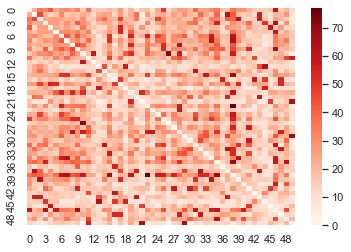

In [15]:
import seaborn as sns

sns.set()
sns.heatmap(cluster_count,cmap="Reds")
plt.show()

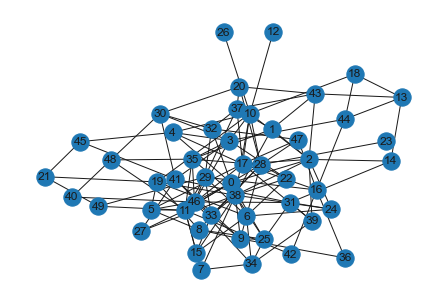

In [16]:
nx.draw(G,with_labels=True)

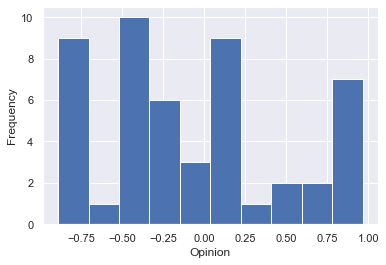

In [17]:
plt.hist(res[0])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()

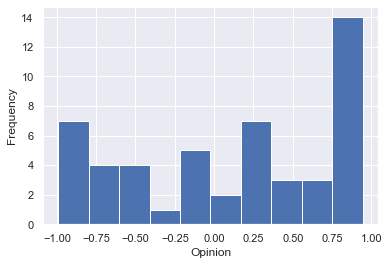

In [18]:
plt.hist(res[5])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()

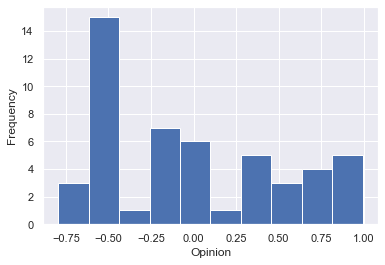

In [19]:
plt.hist(res[80])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()